In [3]:
from scipy.io import loadmat

# YOU SHOULD HAVE THE FOLLOWING MAT FILE !
Data = loadmat('data/egypt_data/preprocessed data/zeros_shore_data.mat')["Values"]

In [ ]:
area = 60

In [4]:
print(Data.shape)
Data = Data.reshape(8760,139,82,3)
print(Data.shape)

data = Data[:,:area,:area,:]
print(data.shape)

(8760, 11398, 3)
(8760, 139, 82, 3)
(8760, 60, 60, 3)


In [5]:
import numpy as np

# Assuming your data is in a variable called 'data'
# Shape of data: (8760, 139, 82, 3)
# Split your data into train, validation and test sets
train_data = data[:8000]
val_data = data[8000:8500]
test_data = data[8500:]
print(data.shape)

# Prepare your datasets
def prepare_data(data, steps):
    x, y = [], []
    for i in range(len(data)-steps-1):
        x.append(data[i:(i+steps)])
        y.append(data[i+steps][:,:,0])  # We only want to predict the first feature
    return np.array(x), np.array(y)

x_train, y_train = prepare_data(train_data, 16)
x_val, y_val = prepare_data(val_data, 16)
x_test, y_test = prepare_data(test_data, 16)



(8760, 60, 60, 3)


In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ConvLSTM2D, Flatten, Dense




In [7]:
model = Sequential()
model.add(ConvLSTM2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(16, area, area, 3)))
model.add(Flatten())
model.add(Dense(60*60))
model.add(tf.keras.layers.Reshape((area, area)))

In [10]:
model.compile(optimizer='adam', loss='mse')

In [11]:
model.fit(x_train, y_train, epochs=10, verbose=1, validation_data=(x_val, y_val))


Epoch 1/10
250/250 [==============================] - 11441s 46s/step - loss: 1.1489 - val_loss: 0.0077
Epoch 2/10
250/250 [==============================] - 3140s 13s/step - loss: 0.0097 - val_loss: 0.0056
Epoch 3/10
250/250 [==============================] - 3191s 13s/step - loss: 0.0082 - val_loss: 0.0046
Epoch 4/10
250/250 [==============================] - 3241s 13s/step - loss: 0.0074 - val_loss: 0.0041
Epoch 5/10
250/250 [==============================] - 3162s 13s/step - loss: 0.0073 - val_loss: 0.0043
Epoch 6/10
250/250 [==============================] - 3224s 13s/step - loss: 0.0068 - val_loss: 0.0036
Epoch 7/10
250/250 [==============================] - 3513s 14s/step - loss: 0.0070 - val_loss: 0.0050
Epoch 8/10
250/250 [==============================] - 3352s 13s/step - loss: 0.0068 - val_loss: 0.0036
Epoch 9/10
250/250 [==============================] - 3353s 13s/step - loss: 0.0064 - val_loss: 0.0038
Epoch 10/10
250/250 [==============================] - 3330s 13s/step - 

In [12]:
model.save('Egypt models/Simple_ConvLSTM.keras')

In [8]:
from tensorflow import keras
model = keras.models.load_model('Egypt models/Simple_ConvLSTM.keras')


In [9]:
test_loss = model.evaluate(x_test, y_test)
print('Test Loss: {}'.format(test_loss))

8/8 [==============================] - 9s 1s/step - loss: 0.0083
Test Loss: 0.008301233872771263


In [10]:
print(x_test[0].shape)

(16, 60, 60, 3)


In [12]:
x_try = x_test[0].reshape(1,16,area,area,3)
y_try = y_test[0]
y_pred = model.predict(x_try).reshape(area,area)

1/1 [==============================] - 0s 217ms/step


In [13]:
print(y_pred.shape)

(60, 60)


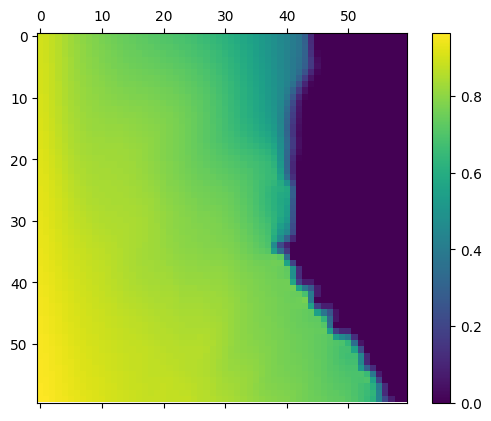

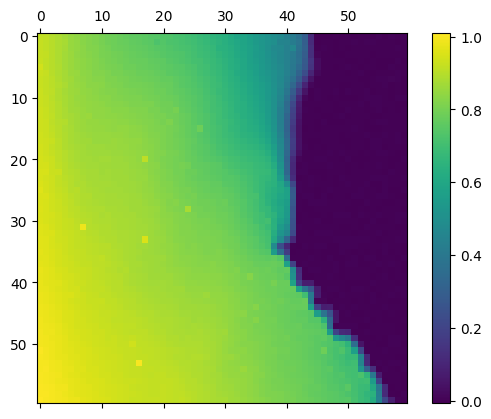

In [18]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
cax = ax.matshow(y_try)
fig.colorbar(cax)
plt.show()

fig, ax = plt.subplots()
cax = ax.matshow(y_pred)
fig.colorbar(cax)
plt.show()